# Credit Card Fraud Detection

**Author**: Ishak Islam  
**Internship ID**: UMID28072552431  
**Date**: January 2026

Analyzing credit card transactions to detect fraud patterns.

## 1. Setup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

COLORS = ['#2ecc71', '#e74c3c']

print("Setup complete")

Setup complete


## 2. Load Data

In [21]:
# Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

df = pd.read_csv('../data/creditcard_2023.csv')
print(f"Loaded {len(df):,} transactions")
df.head()

Loaded 568,630 transactions


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## 3. Data Overview

In [22]:
print("Shape:", df.shape)
print("\nMissing values:", df.isnull().sum().sum())
print("\nClass distribution:")
print(df['Class'].value_counts())

Shape: (568630, 31)

Missing values: 0

Class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


In [23]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,568630.000000,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.000000,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.118237e-17,-5.118237e-17,1.023647e-16,0.000000,2.559118e-17,2.559118e-17,0.000000,1.279559e-17,0.000000,1.023647e-16,0.000000,-1.535471e-16,-6.397796e-18,-5.118237e-17,1.919339e-17,5.118237e-17,0.000000,0.000000,0.000000,-2.559118e-17,1.279559e-17,3.198898e-18,5.598072e-18,-2.559118e-17,-4.478457e-17,0.000000,-2.559118e-17,3.198898e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001,1.000001,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222,-9.952786e+00,-2.111111e+01,-4.351839,-1.075634e+01,-3.751919,-3.163276e+00,-5.954723,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938,-2.421949,-7.804988,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-0.656020,-2.934955e-01,-4.458712e-01,-0.283533,-1.922572e-01,-0.568745,-5.901008e-01,-0.701449,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-0.619491,-0.556046,-0.565308,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-0.631895,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-0.073762,8.108788e-02,7.871758e-02,0.233366,-1.145242e-01,0.092526,2.626145e-01,-0.041050,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,0.271641,0.087294,-0.025979,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-0.011892,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,0.707005,4.397368e-01,4.977881e-01,0.525955,4.729905e-02,0.559262,5.924603e-01,0.747773,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,0.518224,0.544389,0.560116,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,0.672888,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536,4.271689e+01,2.616840e+01,217.873038,5.958040e+00,20.270062,3.172271e+01,2.513573,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124,6.783716,3.831672,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285,1.132311e+02,7.725594e+01,24039.930000,1.0


## 4. Data Preparation

In [24]:
df['Fraud_Label'] = df['Class'].map({0: 'Legitimate', 1: 'Fraud'})

df['Amount_Scaled'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

df['Amount_Category'] = pd.cut(
    df['Amount'],
    bins=[0, 50, 200, 500, 1000, float('inf')],
    labels=['$0-50', '$50-200', '$200-500', '$500-1000', '$1000+']
)

print("Columns added")

Columns added


## 5. Fraud Statistics

In [25]:
total = len(df)
fraud = df['Class'].sum()
legit = total - fraud

print(f"Total transactions: {total:,}")
print(f"Legitimate: {legit:,} ({legit/total*100:.2f}%)")
print(f"Fraud: {fraud:,} ({fraud/total*100:.2f}%)")

Total transactions: 568,630
Legitimate: 284,315 (50.00%)
Fraud: 284,315 (50.00%)


In [26]:
print("\nAmount Statistics:")
df.groupby('Fraud_Label')['Amount'].agg(['mean', 'median', 'std']).round(2)


Amount Statistics:


,mean,median,std
Fraud_Label,,,
Fraud,12057.60,12062.45,6909.75
Legitimate,12026.31,11996.90,6929.50


## 6. Visualizations

In [27]:
VIZ_DIR = Path('../visualizations')
VIZ_DIR.mkdir(exist_ok=True)

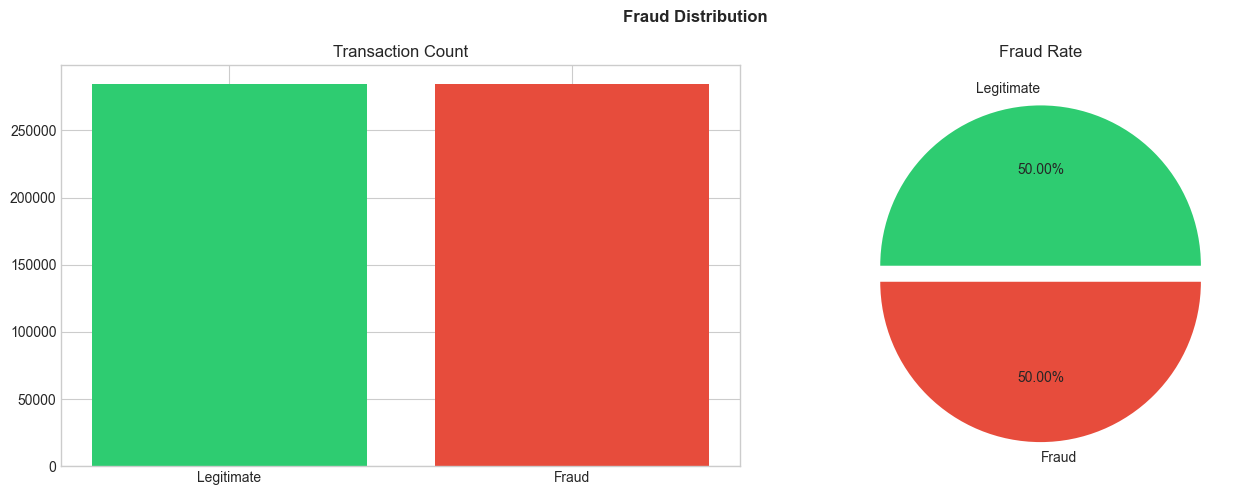

In [28]:
# Fraud distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

counts = df['Fraud_Label'].value_counts()
axes[0].bar(counts.index, counts.values, color=COLORS)
axes[0].set_title('Transaction Count')

axes[1].pie(counts.values, labels=counts.index, autopct='%1.2f%%', colors=COLORS, explode=(0, 0.1))
axes[1].set_title('Fraud Rate')

plt.suptitle('Fraud Distribution', fontweight='bold')
plt.tight_layout()
plt.savefig(VIZ_DIR / '01_fraud_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

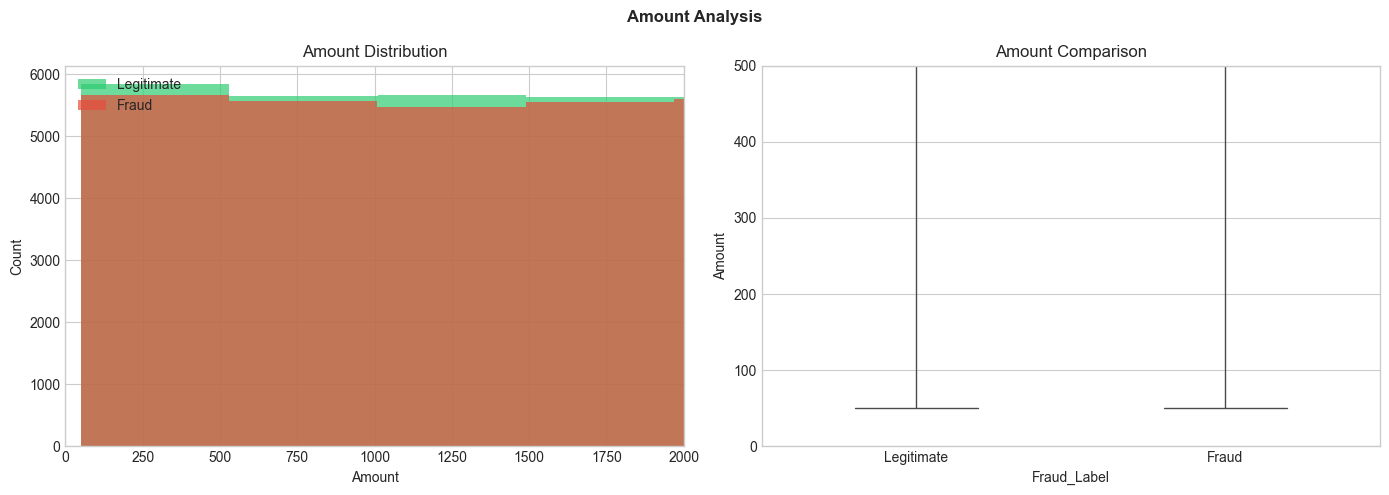

In [29]:
# Amount analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, color in zip(['Legitimate', 'Fraud'], COLORS):
    data = df[df['Fraud_Label'] == label]['Amount']
    axes[0].hist(data, bins=50, alpha=0.7, label=label, color=color)

axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Count')
axes[0].set_title('Amount Distribution')
axes[0].legend()
axes[0].set_xlim(0, 2000)

sns.boxplot(data=df, x='Fraud_Label', y='Amount', palette={'Legitimate': COLORS[0], 'Fraud': COLORS[1]}, ax=axes[1])
axes[1].set_title('Amount Comparison')
axes[1].set_ylim(0, 500)

plt.suptitle('Amount Analysis', fontweight='bold')
plt.tight_layout()
plt.savefig(VIZ_DIR / '02_amount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

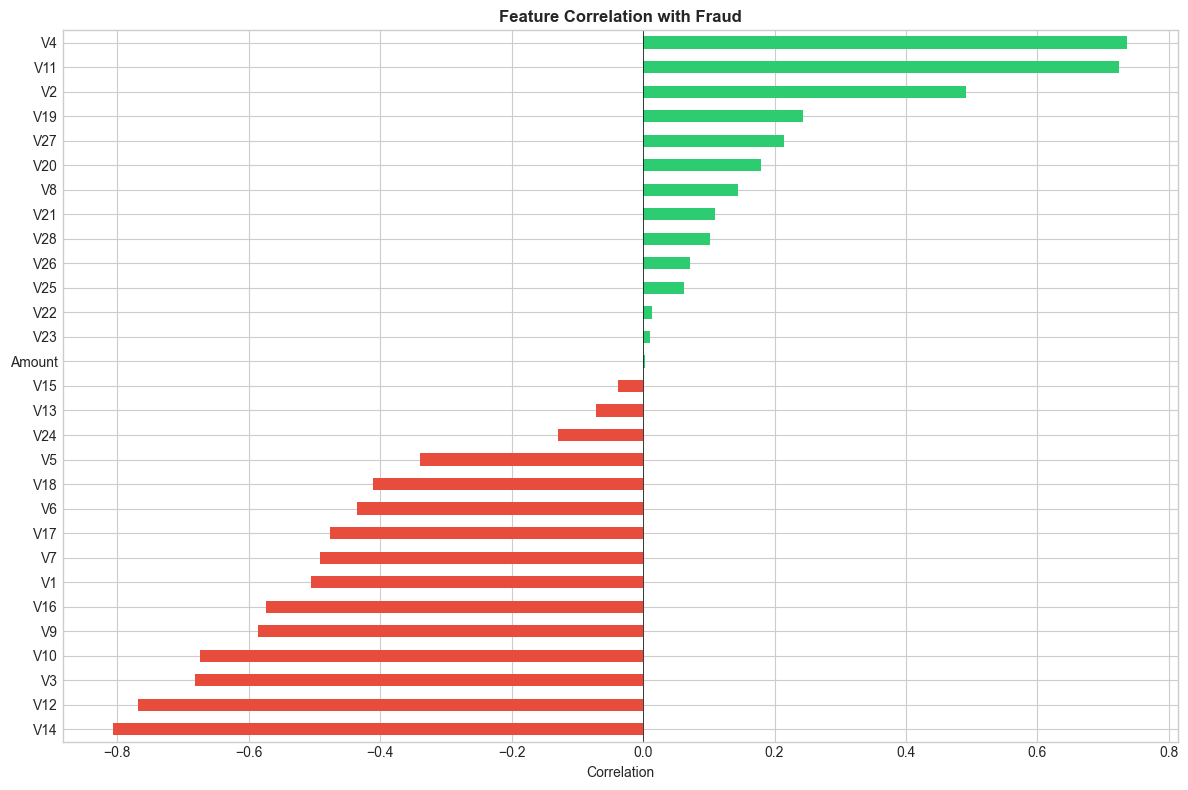

In [30]:
# Feature correlation
v_cols = [c for c in df.columns if c.startswith('V')] + ['Amount']
corr = df[v_cols + ['Class']].corr()['Class'].drop('Class').sort_values()

fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in corr.values]
corr.plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Correlation')
ax.set_title('Feature Correlation with Fraud', fontweight='bold')
ax.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.savefig(VIZ_DIR / '03_feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

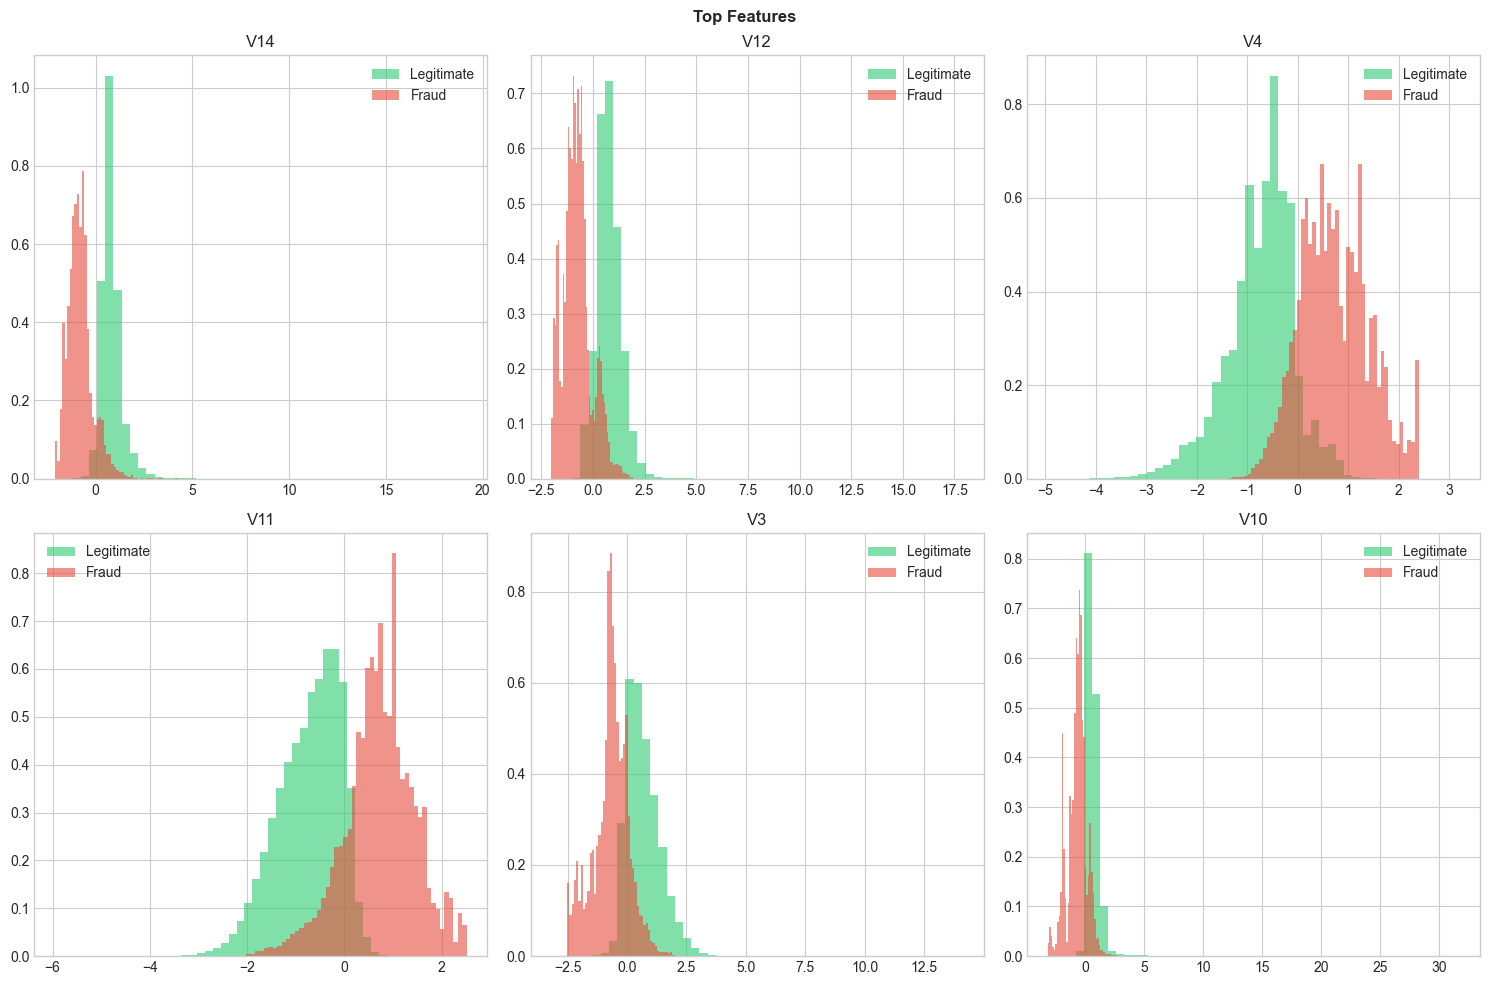

In [31]:
# Top features
abs_corr = corr.abs().sort_values(ascending=False)
top_features = abs_corr.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feat in enumerate(top_features):
    for label, color in zip(['Legitimate', 'Fraud'], COLORS):
        data = df[df['Fraud_Label'] == label][feat]
        axes[i].hist(data, bins=50, alpha=0.6, label=label, color=color, density=True)
    axes[i].set_title(feat)
    axes[i].legend()

plt.suptitle('Top Features', fontweight='bold')
plt.tight_layout()
plt.savefig(VIZ_DIR / '04_top_features.png', dpi=300, bbox_inches='tight')
plt.show()

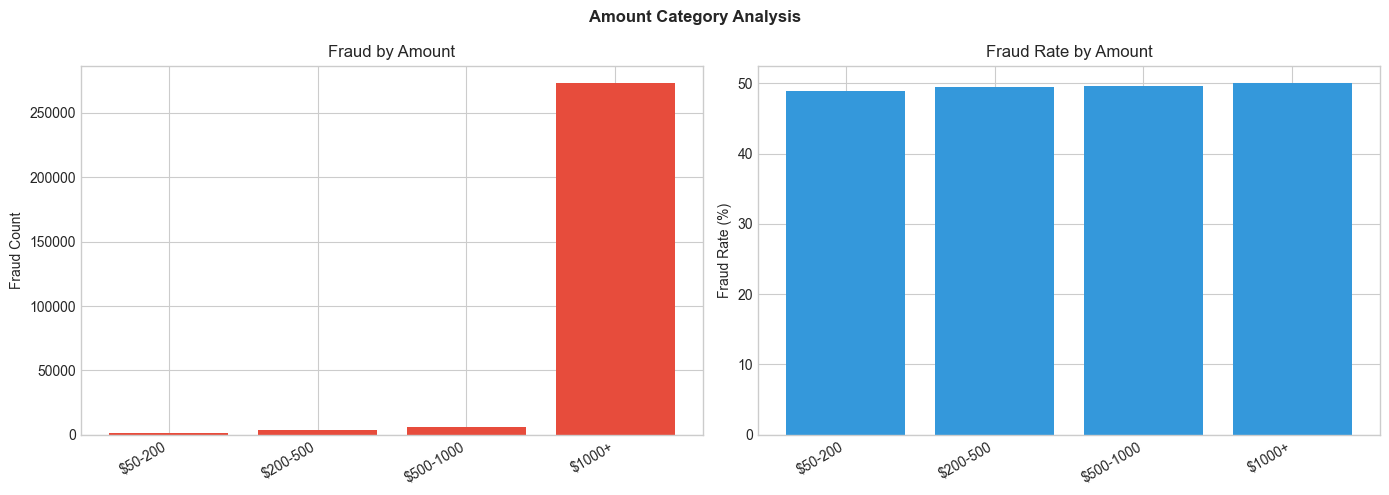

In [32]:
# Fraud by amount category
summary = df.groupby('Amount_Category', observed=True)['Class'].agg(['sum', 'count'])
summary['rate'] = (summary['sum'] / summary['count']) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(len(summary)), summary['sum'], color='#e74c3c')
axes[0].set_xticks(range(len(summary)))
axes[0].set_xticklabels(summary.index, rotation=30, ha='right')
axes[0].set_ylabel('Fraud Count')
axes[0].set_title('Fraud by Amount')

axes[1].bar(range(len(summary)), summary['rate'], color='#3498db')
axes[1].set_xticks(range(len(summary)))
axes[1].set_xticklabels(summary.index, rotation=30, ha='right')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].set_title('Fraud Rate by Amount')

plt.suptitle('Amount Category Analysis', fontweight='bold')
plt.tight_layout()
plt.savefig(VIZ_DIR / '05_fraud_by_amount.png', dpi=300, bbox_inches='tight')
plt.show()

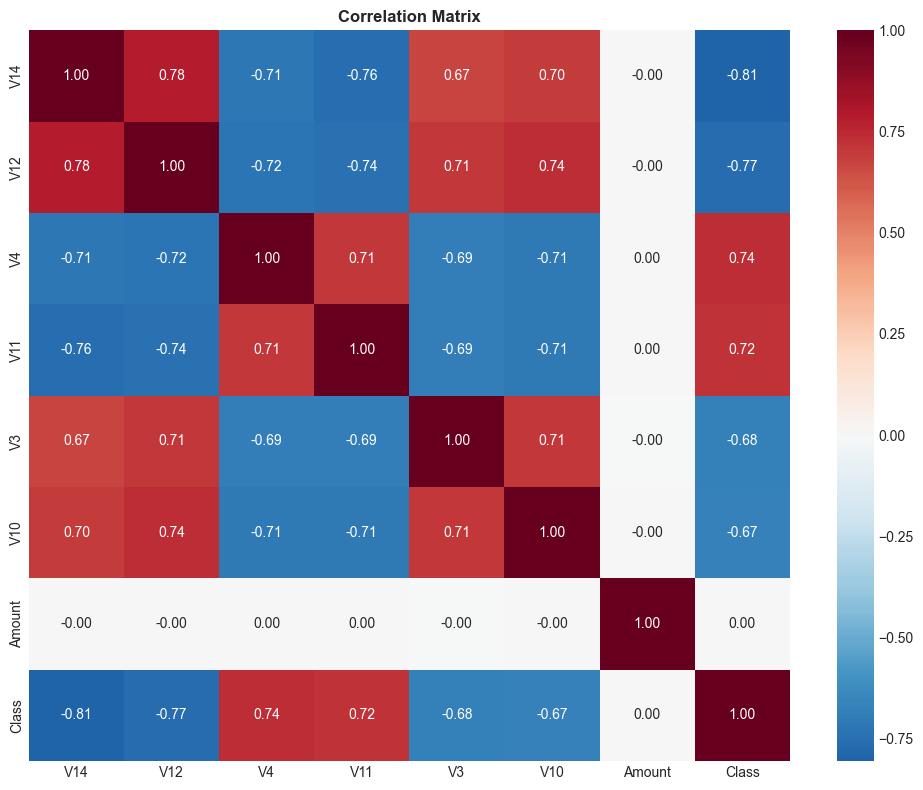

In [33]:
# Correlation matrix
cols = top_features[:8] + ['Amount', 'Class']
matrix = df[cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=ax)
ax.set_title('Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.savefig(VIZ_DIR / '06_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Export for Tableau

In [34]:
TABLEAU_DIR = Path('../tableau')
TABLEAU_DIR.mkdir(exist_ok=True)

# Sample data - realistic balanced sample (50/50 as in original dataset)
sample_size = 20000  # 10,000 each class for manageable Tableau performance
fraud_sample = df[df['Class'] == 1].sample(n=sample_size // 2, random_state=42)
legit_sample = df[df['Class'] == 0].sample(n=sample_size // 2, random_state=42)
sample = pd.concat([fraud_sample, legit_sample])
sample.to_csv(TABLEAU_DIR / 'fraud_data_for_tableau.csv', index=False)

# Summary by amount - with clear column names for Tableau
summary_export = summary.copy()
summary_export.columns = ['Fraud_Count', 'Total_Count', 'Fraud_Rate_Percent']
summary_export['Fraud_Rate_Percent'] = summary_export['Fraud_Rate_Percent'].round(2)
summary_export.to_csv(TABLEAU_DIR / 'summary_by_amount.csv')

# Feature comparison - with clear column names for Tableau
v_top = [c for c in df.columns if c.startswith('V')][:10]
comparison = df.groupby('Class')[v_top + ['Amount']].mean().T
comparison.columns = ['Legitimate_Mean', 'Fraud_Mean']
comparison['Difference'] = (comparison['Fraud_Mean'] - comparison['Legitimate_Mean']).round(3)
comparison['Legitimate_Mean'] = comparison['Legitimate_Mean'].round(3)
comparison['Fraud_Mean'] = comparison['Fraud_Mean'].round(3)
comparison.index.name = 'Feature'
comparison.to_csv(TABLEAU_DIR / 'feature_comparison.csv')

print(f"Exported {len(fraud_sample):,} fraud + {len(legit_sample):,} legitimate = {len(sample):,} total")
print("Files: fraud_data_for_tableau.csv, summary_by_amount.csv, feature_comparison.csv")

Exported to tableau/


## 8. Findings

In [35]:
print("Key Findings:")
print(f"- Fraud rate: {fraud/total*100:.2f}%")
print(f"- Total fraud cases: {fraud:,}")
print(f"- Avg fraud amount: ${df[df['Class']==1]['Amount'].mean():.2f}")
print(f"- Avg legitimate amount: ${df[df['Class']==0]['Amount'].mean():.2f}")
print(f"- Top predictive features: {', '.join(top_features[:3])}")

Key Findings:
- Fraud rate: 50.00%
- Total fraud cases: 284,315
- Avg fraud amount: $12057.60
- Avg legitimate amount: $12026.31
- Top predictive features: V14, V12, V4


In [36]:
print("\nRecommendations:")
print("1. Use class balancing for model training")
print("2. Focus on top correlated features")
print("3. Monitor transactions across all amount ranges")
print("4. Implement real-time scoring system")


Recommendations:
1. Use class balancing for model training
2. Focus on top correlated features
3. Monitor transactions across all amount ranges
4. Implement real-time scoring system


---

**Ishak Islam** | UMID28072552431 | Unified Mentor Internship